In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlretrieve
import json

In [2]:
url, filename = ("https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/%E3%83%AF%E3%82%AD%E3%83%B320120701.JPG/500px-%E3%83%AF%E3%82%AD%E3%83%B320120701.JPG", "goldfish.jpg")
urlretrieve(url, filename)

('goldfish.jpg', <http.client.HTTPMessage at 0x13c5797f0>)

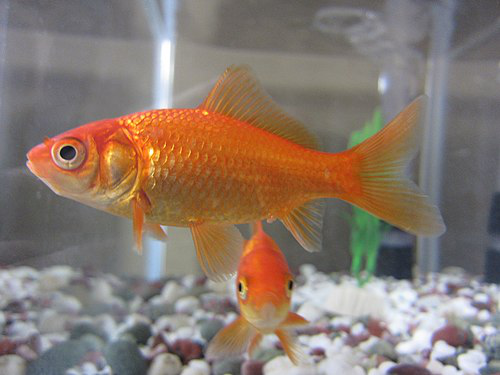

In [3]:
input_image = Image.open(filename)
input_image

In [4]:
# 이미지를 tensor로
preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                ])

input_tensor = preprocess(input_image)
print(input_tensor.shape)

torch.Size([3, 224, 224])


In [5]:
# 모델이 요구하는대로 mini-batch 만들어주기
input_batch = input_tensor.unsqueeze(0)
print(input_batch.shape)

torch.Size([1, 3, 224, 224])


In [6]:
# GPU 사용
# use_cuda = True
# device = torch.device("cuda" if use_cuda else "cpu")
# input_batch = input_batch.to(device, torch.float)

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')
    print('use cuda')
else:
    print('use cpu')

use cpu


#### 이미지넷 클래스 정보 가져오기

In [7]:
# 클래스 1000개
imagenet_json, _ = urlretrieve('http://www.anishathalye.com/media/2017/07/25/imagenet.json')

with open(imagenet_json) as f:
    imagnet_labels = json.load(f)
print(imagnet_labels[1])

goldfish, Carassius auratus


In [8]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
model.eval()

Using cache found in /Users/limkahyun/.cache/torch/hub/pytorch_vision_v0.10.0
/Users/limkahyun/opt/anaconda3/envs/sona/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/limkahyun/opt/anaconda3/envs/sona/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [9]:
# 모델 학습
with torch.no_grad():
    output = model(input_batch)
print(output.shape) # 1개의 이미지에 대해 1000개의 클래스 점수

torch.Size([1, 1000])


In [12]:
# softmax로 1000개의 클래스에 대한 확률을 얻을 수 있음
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100

In [13]:
# output은 정규화 되지 않은 score로, softmax로 1000개의 클래스에 대한 확률을 얻을 수 있음
probabilities = torch.nn.functional.softmax(output[0], dim=0)

In [15]:
# 가장 높은 확률을 가지는 카테고리 top5
for i in output[0].topk(5)[1]:
    print('=====')
    print(f'인덱스{i.item()}')
    print(f'클래스{imagnet_labels[i]}')
    print(f'확률{percentage[i].item():.6f}%')

=====
인덱스1
클래스goldfish, Carassius auratus
확률99.999870%
=====
인덱스124
클래스crayfish, crawfish, crawdad, crawdaddy
확률0.000031%
=====
인덱스29
클래스axolotl, mud puppy, Ambystoma mexicanum
확률0.000030%
=====
인덱스130
클래스flamingo
확률0.000021%
=====
인덱스395
클래스gar, garfish, garpike, billfish, Lepisosteus osseus
확률0.000019%
